In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from random import randint

In [2]:
def constFunc(values):
    ans = 0
    idealWeights = [0.3,0.1,-0.8,0.3,1.2]
    for i in range(len(values)):
        ans += values[i]*idealWeights[i]
    return ans

In [45]:
# Creating fake dataset with a simple function, meant to compare final values

x = []
y = []

for samples in range(10):
    values = []
    for attribute in range(5):
        values.append(randint(0,100)/100.0)
    x.append(values)
    y.append(constFunc(values))
print(x,len(x))
print(y,len(y))

[[0.75, 0.02, 0.37, 0.12, 0.32], [0.55, 0.4, 0.05, 0.06, 0.62], [0.94, 0.38, 0.8, 0.64, 0.62], [0.3, 0.51, 0.46, 0.17, 0.99], [0.61, 0.15, 0.51, 0.07, 0.51], [0.97, 0.1, 0.45, 0.61, 0.63], [0.16, 0.66, 0.17, 0.0, 0.56], [0.52, 0.39, 0.04, 0.63, 0.76], [0.31, 0.52, 0.39, 0.76, 0.91], [0.25, 0.48, 0.3, 0.37, 0.36]] 10
[0.351, 0.927, 0.6159999999999999, 1.012, 0.42299999999999993, 0.8799999999999999, 0.65, 1.2639999999999998, 1.153, 0.426] 10


In [3]:
model = Sequential()
model.add(Dense(1, input_shape = (5,)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[-0.49622416],
        [ 0.54916906],
        [ 0.37782454],
        [ 0.81151175],
        [ 0.56477547]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [53]:
inp = np.array(x[0], dtype = np.float32)
print(inp.shape)
model.predict(x)

(5,)


array([[0.50195426],
       [0.7218475 ],
       [1.1793672 ],
       [0.6737041 ],
       [0.4611612 ],
       [1.0694453 ],
       [0.58644414],
       [1.1352798 ],
       [1.1263335 ],
       [0.72769725]], dtype=float32)

In [55]:
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x,y)

1/1 [==============================] - 0s 3ms/step - loss: 0.0646


In [56]:
model.predict(x)

array([[0.49937454],
       [0.7191681 ],
       [1.174988  ],
       [0.67027503],
       [0.45831165],
       [1.0656859 ],
       [0.5838949 ],
       [1.1319405 ],
       [1.1224444 ],
       [0.7249378 ]], dtype=float32)

In [57]:
model.weights

[<tf.Variable 'dense_22/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 0.60095733],
        [ 0.6961933 ],
        [-0.25221017],
        [ 0.73194474],
        [ 0.12880333]], dtype=float32)>,
 <tf.Variable 'dense_22/bias:0' shape=(1,) dtype=float32, numpy=array([-0.00099997], dtype=float32)>]

In [68]:
weightMatrix = []
weightMatrix.append(np.array(model.get_weights()))

In [81]:
print(weightMatrix[0])
for i in weightMatrix[0]:
    print(i)
    ar = np.array(i)
    for j in ar:
        print(j)
        print()
#     print()


[array([[ 0.60095733],
       [ 0.6961933 ],
       [-0.25221017],
       [ 0.73194474],
       [ 0.12880333]], dtype=float32)
 array([-0.00099997], dtype=float32)]
[[ 0.60095733]
 [ 0.6961933 ]
 [-0.25221017]
 [ 0.73194474]
 [ 0.12880333]]
[0.60095733]

[0.6961933]

[-0.25221017]

[0.73194474]

[0.12880333]

[-0.00099997]
-0.0009999672



In [5]:
# Creating fake dataset with a simple function, meant to compare final values

x = []
y = []

for samples in range(100000):
    values = []
    for attribute in range(5):
        values.append(randint(0,50000)/50000.0)
    x.append(values)
    y.append(constFunc(values))
print(len(x))
print(len(y))

100000
100000


In [6]:
model.compile(optimizer = 'adam', loss = 'mse')
trackingArray = []
for i in range(0,100000,10):
    model.fit(x[i:i+10],y[i:i+10])
    trackingArray.append(np.array(model.get_weights()))
# trackingArray = np.asarray(trackingArray)
# print(trackingArray.shape)
print(len(trackingArray))

1/1 [==============================] - 0s 1ms/step - loss: 0.3162


1/1 [==============================] - 0s 1ms/step - loss: 0.2854


1/1 [==============================] - 0s 829us/step - loss: 0.0975


1/1 [==============================] - 0s 872us/step - loss: 0.0769


1/1 [==============================] - 0s 782us/step - loss: 0.1073


1/1 [==============================] - 0s 1ms/step - loss: 0.0458


1/1 [==============================] - 0s 839us/step - loss: 0.0807


1/1 [==============================] - 0s 902us/step - loss: 0.0265


1/1 [==============================] - 0s 794us/step - loss: 0.0701


1/1 [==============================] - 0s 864us/step - loss: 0.0379


1/1 [==============================] - 0s 2ms/step - loss: 0.0442


1/1 [==============================] - 0s 836us/step - loss: 0.0296


1/1 [==============================] - 0s 1ms/step - loss: 0.0198


1/1 [==============================] - 0s 979us/step - loss: 0.0030


1/1 [==============================] - 0s 869us/step - loss: 0.0094


1/1 [==============================] - 0s 911us/step - loss: 0.0081


1/1 [==============================] - 0s 914us/step - loss: 0.0016


1/1 [==============================] - 0s 1ms/step - loss: 0.0053


1/1 [==============================] - 0s 1ms/step - loss: 0.0025


1/1 [==============================] - 0s 906us/step - loss: 0.0021


1/1 [==============================] - 0s 1ms/step - loss: 0.0020


1/1 [==============================] - 0s 853us/step - loss: 0.0010


1/1 [==============================] - 0s 949us/step - loss: 6.9336e-04


1/1 [==============================] - 0s 912us/step - loss: 4.5687e-04


1/1 [==============================] - 0s 1ms/step - loss: 5.9502e-04


1/1 [==============================] - 0s 1ms/step - loss: 3.9180e-04


1/1 [==============================] - 0s 817us/step - loss: 9.6904e-05


1/1 [==============================] - 0s 861us/step - loss: 3.1459e-04


1/1 [==============================] - 0s 900us/step - loss: 1.0149e-04


1/1 [==============================] - 0s 957us/step - loss: 8.0236e-05


1/1 [==============================] - 0s 809us/step - loss: 7.8138e-05


1/1 [==============================] - 0s 800us/step - loss: 5.2344e-05


1/1 [==============================] - 0s 1ms/step - loss: 1.2666e-05


1/1 [==============================] - 0s 880us/step - loss: 3.0000e-05


1/1 [==============================] - 0s 842us/step - loss: 1.2328e-05


1/1 [==============================] - 0s 2ms/step - loss: 5.0792e-06


1/1 [==============================] - 0s 1ms/step - loss: 7.9507e-06


1/1 [==============================] - 0s 894us/step - loss: 3.2842e-06


1/1 [==============================] - 0s 1ms/step - loss: 3.7166e-06


1/1 [==============================] - 0s 855us/step - loss: 1.0369e-06


1/1 [==============================] - 0s 924us/step - loss: 1.0411e-06


1/1 [==============================] - 0s 909us/step - loss: 4.0500e-07


1/1 [==============================] - 0s 880us/step - loss: 4.4244e-07


1/1 [==============================] - 0s 811us/step - loss: 1.0012e-07


1/1 [==============================] - 0s 982us/step - loss: 6.6892e-08


1/1 [==============================] - 0s 932us/step - loss: 3.0129e-08


1/1 [==============================] - 0s 901us/step - loss: 1.7056e-08


1/1 [==============================] - 0s 1ms/step - loss: 7.1576e-09


1/1 [==============================] - 0s 849us/step - loss: 3.6678e-09


1/1 [==============================] - 0s 942us/step - loss: 8.9196e-10


1/1 [==============================] - 0s 807us/step - loss: 5.6693e-10


1/1 [==============================] - 0s 904us/step - loss: 2.3700e-10


1/1 [==============================] - 0s 810us/step - loss: 6.5342e-11


1/1 [==============================] - 0s 861us/step - loss: 1.9648e-11


1/1 [==============================] - 0s 853us/step - loss: 5.4664e-12


1/1 [==============================] - 0s 862us/step - loss: 3.4399e-12


1/1 [==============================] - 0s 1ms/step - loss: 6.8452e-13


1/1 [==============================] - 0s 997us/step - loss: 6.7683e-13


1/1 [==============================] - 0s 965us/step - loss: 3.9436e-13


1/1 [==============================] - 0s 885us/step - loss: 5.6192e-13


1/1 [==============================] - 0s 918us/step - loss: 2.3071e-13


1/1 [==============================] - 0s 1ms/step - loss: 3.6018e-13


1/1 [==============================] - 0s 1ms/step - loss: 4.9776e-13


1/1 [==============================] - 0s 901us/step - loss: 1.2502e-13


1/1 [==============================] - 0s 885us/step - loss: 1.8659e-13


1/1 [==============================] - 0s 886us/step - loss: 1.7147e-13


1/1 [==============================] - 0s 866us/step - loss: 1.5014e-13


1/1 [==============================] - 0s 1ms/step - loss: 1.6958e-13


1/1 [==============================] - 0s 867us/step - loss: 1.6254e-13


1/1 [==============================] - 0s 908us/step - loss: 2.0866e-13


1/1 [==============================] - 0s 869us/step - loss: 1.4599e-13


1/1 [==============================] - 0s 1ms/step - loss: 1.5934e-13


1/1 [==============================] - 0s 865us/step - loss: 9.6012e-14


1/1 [==============================] - 0s 850us/step - loss: 4.8095e-14


1/1 [==============================] - 0s 888us/step - loss: 8.1446e-14


1/1 [==============================] - 0s 868us/step - loss: 2.6207e-14


1/1 [==============================] - 0s 1ms/step - loss: 4.3592e-14


1/1 [==============================] - 0s 1ms/step - loss: 6.1129e-14


1/1 [==============================] - 0s 1ms/step - loss: 7.8565e-14


1/1 [==============================] - 0s 1ms/step - loss: 1.9976e-14


1/1 [==============================] - 0s 1ms/step - loss: 1.5921e-14


1/1 [==============================] - 0s 819us/step - loss: 1.7053e-14


1/1 [==============================] - 0s 858us/step - loss: 1.4699e-14


1/1 [==============================] - 0s 1ms/step - loss: 3.5745e-14


1/1 [==============================] - ETA: 0s - loss: 3.2419e-1 - 0s 1ms/step - loss: 3.2419e-14


1/1 [==============================] - 0s 1ms/step - loss: 1.0349e-14
10000


In [7]:
print(model.predict(x[:10]))
print("\n\n\n\n\n",y[:10])

[[ 0.15641402]
 [ 0.25102583]
 [-0.03540595]
 [ 0.3906179 ]
 [ 0.8050739 ]
 [ 1.473444  ]
 [ 1.086932  ]
 [ 0.74263227]
 [ 0.552106  ]
 [ 0.3859439 ]]





 [0.1564139999999999, 0.25102599999999997, -0.035406000000000104, 0.39061799999999997, 0.8050739999999998, 1.473444, 1.086932, 0.7426319999999997, 0.552106, 0.38594399999999995]


In [8]:
print(trackingArray[-1])
print("ideal:", [0.3,0.1,-0.8,0.3,1.2])

[array([[ 0.29999995],
       [ 0.10000002],
       [-0.7999998 ],
       [ 0.3       ],
       [ 1.2000004 ]], dtype=float32)
 array([-3.162635e-07], dtype=float32)]
ideal: [0.3, 0.1, -0.8, 0.3, 1.2]


In [9]:
npTA = np.array(trackingArray)

In [10]:
# attribute1 = npTA[:,0,0]
# print(attribute1.shape)
# print(attribute1[:10])
a1 = []
for i in range(int(npTA.shape[0])):
    a1.append(float(npTA[i][0][0]))
print(len(a1))
print(a1[:10])

10000
[-0.4972241520881653, -0.49820199608802795, -0.4991263747215271, -0.5000802278518677, -0.5010097026824951, -0.5019447803497314, -0.5029027462005615, -0.5037910342216492, -0.5044428706169128, -0.5051640868186951]


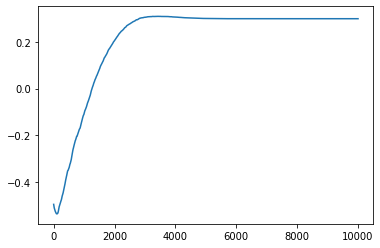

In [11]:
import matplotlib.pyplot as plt
plt.plot(a1)